[Image Processing in OpenCV](https://docs.opencv.org/4.0.1/d2/d96/tutorial_py_table_of_contents_imgproc.html)

## P47 形态学运算腐蚀

理论  
形态学转换(Morphological Transformations)  
在图像中提取分量信息，通常是图像最基本的形状特征  
如在识别手写数字时，能通过形态学运算得到其骨架信息  
在具体识别时，仅针对其骨架进行运算即可  
形态学在处理视觉检测、文字识别、医学图像处理、图像压缩编码等领域都有着重要的应用  

腐蚀可以将图像的边界点消除，使图像沿着边界向内收敛，也可以将小于指定结构体元素的部分取出  



cv.erode()  
dst=cv.erode(src, kernel\[,dstl,anchor\[,iterations\[,border Type\[, border/]/]/]/])  
src:输入图像，通道任意，深度必须为CV_8U, CV_16U, CV_16S, CV_32F或CV_64F中的一种  
dst:输出图像  
kernel:代表腐蚀操作时所采用的结构类型，可以自定义生成，也可以通过函数cv.getStructuringElement()  
anchor:锚点位置，默认(-1， -1) ，为核的中心位置  
iterations:腐蚀操作的迭代次数，默认值为1,即只进行-次腐蚀操作  
borderType:边界样式BorderTypes  

当kernel完全处于前景图像中，就将结构元中心点输出为前景色  
否则，结构元中心点输出位背景色


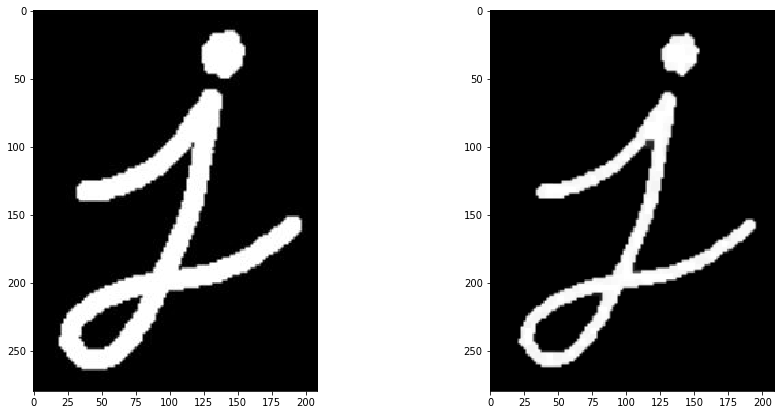

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

img = cv.imread('./opencv_dataset_01/cv_1301.JPG',0) #灰色图像
imageRGB = cv.cvtColor(img, cv.COLOR_GRAY2RGB )
tool.pltGrid(1,1)
plt.imshow(imageRGB)

kernel = np.ones((5, 5), np.uint8)#尺寸只能是奇数

erosion = cv.erode(img, kernel, iterations = 1)
imageRGB = cv.cvtColor(erosion, cv.COLOR_BGR2RGB) 
tool.pltGrid(2,1)
plt.imshow(imageRGB)
plt.show()


In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

img = np.zeros((5, 5), np.uint8)
img[1:4,1:4] =1
kernel = np.ones((3, 1), np.uint8)
erosion = cv.erode(img, kernel)
print( 'img\n', img)
print(' kernel\n',kernel)
print('erosion\n',erosion)


img
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
 kernel
 [[1]
 [1]
 [1]]
erosion
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


## P48 膨胀
如果kermeI中任意-点在前景图像中， 则kermel中心点输出位前景像素


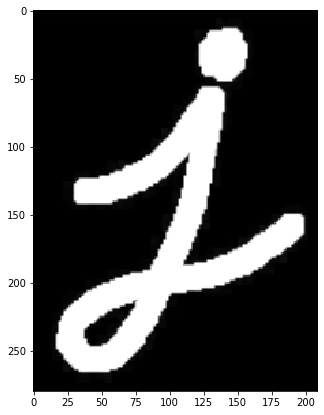

img
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
kernel
 [[1]
 [1]
 [1]]
dilation
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
# tool.setGrid(1,2)

img = cv.imread('./opencv_dataset_01/cv_1301.JPG' ,0) #灰色图像
kernel = np.ones ((5, 5),np.uint8)
dilation = cv.dilate(img, kernel, iterations = 1)
imageRGB = cv.cvtColor(dilation, cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

img = np.zeros((5, 5), np.uint8)
img[2,1:4] =1
kernel = np.ones((3, 1),np.uint8)
dilation = cv.dilate (img, kernel, iterations = 1)
print('img\n' ,img)
print('kernel\n',kernel)
print('dilation\n',dilation)


## P49 通用形态学函数
腐蚀操作和膨胀操作时形态学运算的基础，将腐蚀和膨胀操作进行结合,就可以实现开运算、闭运算(关运算)、 形态学梯度运算、 礼帽运算、黑帽运算等等  
dst=cv.morphologyEx(src, op, kernel\[,dst\[, anchorf,iterations\[,border Type\[bordelValue\]\]\]\])  
op为操作类型
<table class="fieldtable">
<tbody>
<tr><th colspan="2"><p>Enumerator</p></th></tr>
<tr><td><p>MORPH_ERODE&nbsp; <br> Python: cv.MORPH_ERODE</p></td>
<td><p>see <a class="el" href="https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb" title="Erodes an image by using a specific structuring element. ">erode</a> </p>
</td></tr>
<tr><td><p>MORPH_DILATE&nbsp; <br> Python: cv.MORPH_DILATE</p></td>
<td><p>see <a class="el" href="https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c" title="Dilates an image by using a specific structuring element. ">dilate</a> </p>
</td></tr>
<tr><td><p>MORPH_OPEN&nbsp; <br> Python: cv.MORPH_OPEN</p></td>
<td><p>an opening operation </p><p>
dst=open(src,element)=dilate(erode(src,element))
</p>
 </td></tr>
<tr><td><p>MORPH_CLOSE&nbsp; <br> Python: cv.MORPH_CLOSE</p></td>
<td><p>a closing operation </p><p>
dst=close(src,element)=erode(dilate(src,element))
</p>
 </td></tr>
<tr><td><p>MORPH_GRADIENT&nbsp; <br> Python: cv.MORPH_GRADIENT</p></td>
<td><p>a morphological gradient </p><p>
dst=morph_grad(src,element)=dilate(src,element)−erode(src,element)
</p>
 </td></tr>
<tr><td><p>MORPH_TOPHAT&nbsp; <br> Python: cv.MORPH_TOPHAT</p></td>
<td><p>"top hat" </p><p>
dst=tophat(src,element)=src−open(src,element)
</p>
 </td></tr>
<tr><td><p>MORPH_BLACKHAT&nbsp; <br> Python: cv.MORPH_BLACKHAT</p></td>
<td><p>"black hat" </p><p>
dst=blackhat(src,element)=close(src,element)−src
</p>
 </td></tr>
<tr><td><p>MORPH_HITMISS&nbsp; <br> Python: cv.MORPH_HITMISS</p></td>
<td><p>"hit or miss" .- Only supported for CV_8UC1 binary images. A tutorial can be found in the documentation </p>
</td></tr>
</tbody></table>

- MORPH_ERODE 腐蚀操作
- MORPH_DILATE 膨胀操作
- MORPH_OPEN 开运算 侵蚀膨胀 *(消除 去掉关注区的细节)*
- MORPH_CLOSE 闭运算 膨胀侵蚀 *(补充 去掉非关注区域的细节)*
- MORPH_GRADIENT 梯度操作 膨胀-侵蚀 *(取边缘)*
- MORPH_TOPHAT 礼帽操作 src-开运算 *取多出的部分*
- MORPH_BLACKHAT 黑帽操作 闭运算-src
- MORPH_HITMISS ??

## P50 开运算闭运算


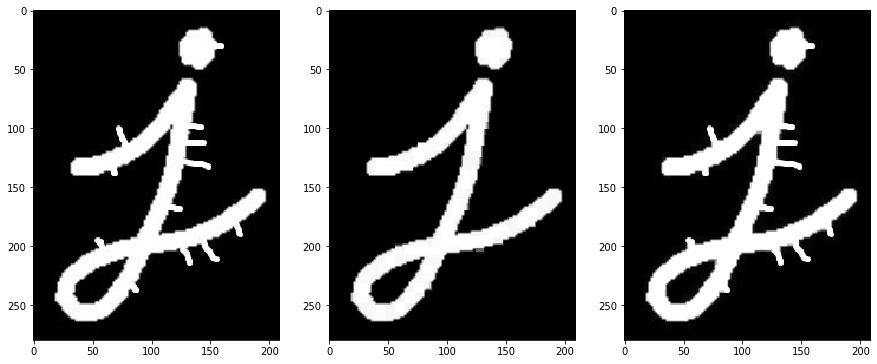

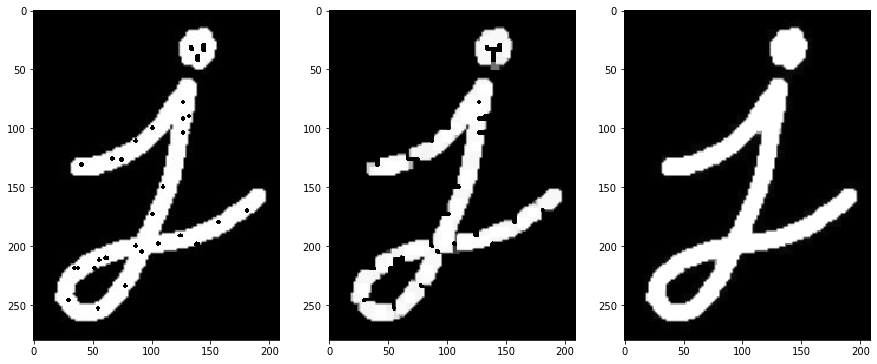

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
# tool.setGrid(1,2)

# img = cv.imread('./opencv_dataset_01/cv_1302.JPG' ,0) #灰色图像
# imageRGB = cv.cvtColor(img, cv.COLOR_GRAY2RGB)#cv.COLOR_BGR2RGB)
# tool.pltGrid(1,1)
# plt.imshow(imageRGB)

# kernel = np.ones((7, 7), np.uint8)
# opening = cv.morphologyEx(img,cv.MORPH_OPEN, kernel)
# imageRGB = cv.cvtColor(opening,cv.COLOR_BGR2RGB)
# tool.pltGrid(2,1)
# plt.imshow(imageRGB) 

# plt.show()

# img = cv.imread('./opencv_dataset_01/cv_1303.JPG' ,0) #灰色图像
# imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# tool.pltGrid(1,1)
# plt.imshow(imageRGB)

# kernel = np.ones((5, 5), np.uint8)
# closing = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel)
# imageRGB = cv.cvtColor(closing,cv.COLOR_BGR2RGB)
# tool.pltGrid(2,1)
# plt.imshow(imageRGB)
# plt.show()

tool.setGrid(1,3)

img = cv.imread('./opencv_dataset_01/cv_1302.JPG' ,0) #灰色图像
imageRGB = cv.cvtColor(img, cv.COLOR_GRAY2RGB)#cv.COLOR_BGR2RGB)
tool.pltGrid(1,1)
plt.imshow(imageRGB)

okernel = np.ones((7, 7), np.uint8)
ckernel = np.ones((5, 5), np.uint8)
opening = cv.morphologyEx(img,cv.MORPH_OPEN, okernel)#消除 用第一步的腐蚀丢失消息
imageRGB = cv.cvtColor(opening,cv.COLOR_BGR2RGB)
tool.pltGrid(2,1)
plt.imshow(imageRGB)
closing = cv.morphologyEx(img,cv.MORPH_CLOSE,ckernel)#补充 用第一步的膨胀丢失消息
imageRGB = cv.cvtColor(closing,cv.COLOR_BGR2RGB)
tool.pltGrid(3,1)
plt.imshow(imageRGB) 

plt.show()

img = cv.imread('./opencv_dataset_01/cv_1303.JPG' ,0) #灰色图像
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
tool.pltGrid(1,1)
plt.imshow(imageRGB)

opening = cv.morphologyEx(img,cv.MORPH_OPEN, okernel)
imageRGB = cv.cvtColor(opening,cv.COLOR_BGR2RGB)
tool.pltGrid(2,1)
plt.imshow(imageRGB)
closing = cv.morphologyEx(img,cv.MORPH_CLOSE,ckernel)
imageRGB = cv.cvtColor(closing,cv.COLOR_BGR2RGB)
tool.pltGrid(3,1)
plt.imshow(imageRGB) 
plt.show()

## P51 形态学梯度运算
形态学梯度运算(Morphological Gradient)
用图像的膨胀图像减腐蚀图像，该操作可以获取原始图像中前景的图像的边缘


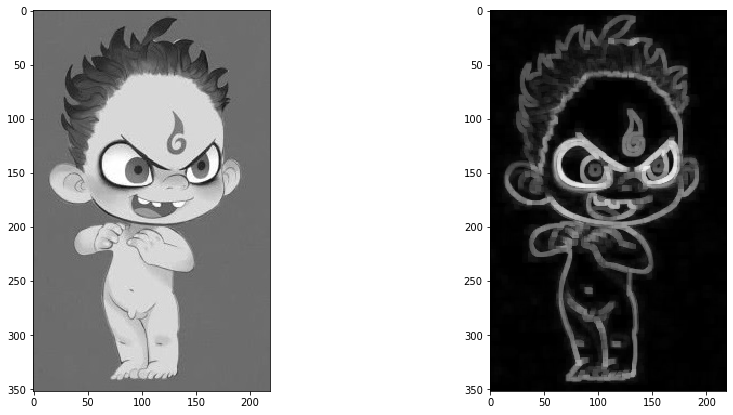

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

# img = cv.imread('./opencv_dataset_01/cv_1111.jpg',0) #灰色图像
# img = cv.imread('./opencv_dataset_01/cv_1112.jpg',0) #灰色图像
# img=cv.imread('./opencv_dataset_01/cv_1116.jpg',0) #灰色图像
img = cv.imread('./opencv_dataset_01/cv_1117.jpg',0) #灰色图像
imageRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
tool.pltGrid(1,1)
plt.imshow(imageRGB)

kernel = np.ones((5, 5), np.uint8)
gradient = cv.morphologyEx(img,cv.MORPH_GRADIENT, kernel)
imageRGB = cv.cvtColor(gradient,cv.COLOR_BGR2RGB)
tool.pltGrid(2,1)
plt.imshow(imageRGB)
plt.show()


## 52 礼帽运算
原图减开运算 取多出的部分


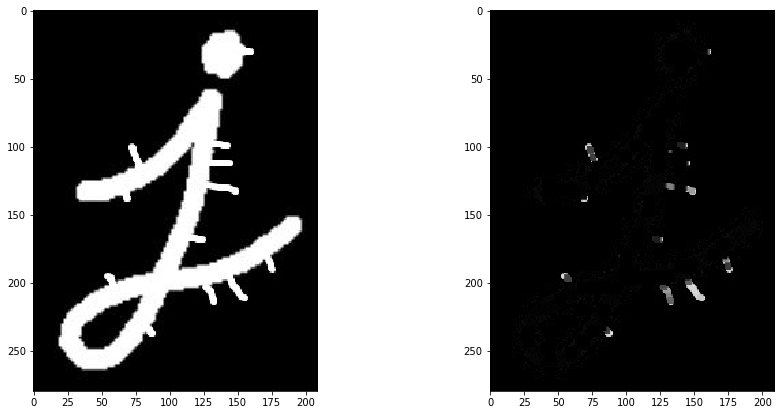

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

img = cv. imread('./opencv_dataset_01/cv_1302.JPG' ,0) #灰色图像
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
tool.pltGrid(1,1)
plt.imshow(imageRGB) 

kernel = np.ones((5, 5), np.uint8) 
tophat = cv.morphologyEx(img,cv.MORPH_TOPHAT,kernel)
tool.pltGrid(2,1)
imageRGB = cv.cvtColor(tophat, cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()


## 53 黑帽运算
黑帽运算(black hat)  
原图减闭运算 取空洞的部分  

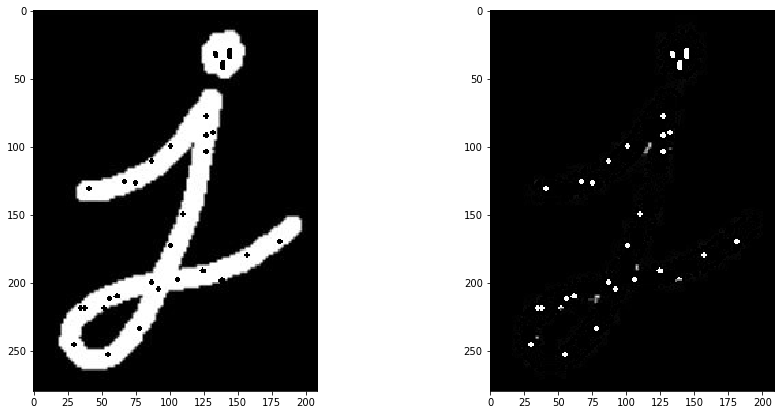

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0,7.0) #调整显示大小
tool.setGrid(1,2)

img = cv. imread('./opencv_dataset_01/cv_1303.JPG' ,0) #灰色图像
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
tool.pltGrid(1,1)
plt.imshow(imageRGB) 

kernel = np.ones((5, 5), np.uint8)
blackhat = cv.morphologyEx(img,cv.MORPH_BLACKHAT,kernel)
imageRGB = cv.cvtColor(blackhat,cv.COLOR_BGR2RGB)
tool.pltGrid(2,1)
plt.imshow(imageRGB)
plt.show()



## 53 核函数

核函数(Structuring Element)  
核，即kernel, 可以自定义，也可以通过函数构造  
[cv.getStructuringElement\(\)](getStructuringElement)  
retval=cv.getStructuringElement(shape, ksize\[,anchor\])
- shape: 形状类型
<table class="fieldtable">
<tbody>
<tr>
<th colspan="2"><p>Enumerator</p></th>
</tr>
<tr>
<td><p>MORPH_RECT<br>Python: cv.MORPH_RECT</p></td>
<td><p>a rectangular structuring element:</p>
  <p>$
    E_{ij}=1
  $</p>
</td></tr>
<tr>
<td><p>MORPH_CROSS<br>Python: cv.MORPH_CROSS</p></td>
<td><p>a cross-shaped structuring element: </p>
   <p>$
       E_{ij}=
        \begin{cases}
           1 & if i=\texttt{anchor.y} or j=\texttt{anchor.x} \\
           0 & otherwise
        \end{cases}
   $</p>
 </td></tr>
<tr>
<td><p>MORPH_ELLIPSE<br>Python: cv.MORPH_ELLIPSE</p></td>
<td><p>an elliptic structuring element, that is, a filled ellipse inscribed into the rectangle Rect(0, 0, esize.width, 0.esize.height)
</p></td></tr>
</tbody>
</table>

<!--E_{ij} = \fork{1}{if i=\texttt{anchor.y} or j=\texttt{anchor.x}}{0}{otherwise}-->
 
- ksize:结构元素大小
- anchor:默认(-1, -1)为形状的中心


In [45]:
import cv2 as cv


# Rectangular Kernel矩形结构
cernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
print(cernel)
# El1iptical KerneI 椭圆结构
cernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
print(cernel)


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
